In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from utils import read_neutouch_raw, infer, bin_neutouch_signal

In [2]:
# def load_model(tool_length):
#     gs_estimator = pickle.load(open('tool' + str(tool_length) +'_fft_svmrbf.pkl', 'rb'))
#     return gs_estimator

In [3]:
# def read_neutouch_raw(filepath):
    
#     df = pd.read_csv(filepath,
#                      names=['isPos', 'taxel', 'removable', 't'],
#                      dtype={'isPos': int , 'taxel': int, 'removable': int, 't': float},
#                      sep=' ')
    
#     df.drop(['removable'], axis=1, inplace=True)
#     df.drop(df.tail(1).index, inplace=True)
#     df.drop(df.head(1).index, inplace=True)
    
#     return df.reset_index(drop=True)

In [4]:
tool_length = 30
trial = 10
df_raw = read_neutouch_raw(f'/datasets/sensory_ext/data/neutouch/tool_neutouch_1k/trial{trial}_{tool_length}.tact')
#df_raw = df_raw.iloc[]
df_essentials = pd.read_csv(f'/datasets/sensory_ext/data/neutouch/tool_neutouch_1k/trial{trial}_{tool_length}_essentials.csv')
#df_essentials = df_essentials.iloc[]

In [5]:
df_essentials.head()

,original_index,t,label_y
0,699,1.613139e+09,0.199787
1,789,1.613139e+09,0.080649
2,881,1.613139e+09,0.126195
3,962,1.613139e+09,0.152468
4,1041,1.613139e+09,0.249933


In [6]:
# def bin_neutouch_signal(tap_time, df_raw, time_past, time_future, time_interval):

#     n_bins = int((time_past + time_future) / time_interval) + 1
#     signal = np.zeros([1, 80, n_bins], dtype=int)


#     df_timespan = df_raw[(df_raw.t >= (tap_time - time_past)) & (df_raw.t < (tap_time + time_future))]
#     print(df_timespan.shape)
#     df_positive = df_timespan[df_timespan.isPos == 1]
#     df_negative = df_timespan[df_timespan.isPos == 0]

#     t = tap_time - time_past
#     k = 0

#     while t < (tap_time + time_future):

#         positive_taxels = df_positive[((df_positive.t >= t) & (df_positive.t < t + time_interval))].taxel
#         if len(positive_taxels):
#             for taxel in positive_taxels:
#                 signal[0, taxel - 1, k] += 1

#         negative_taxels = df_negative[((df_negative.t >= t) & (df_negative.t < t + time_interval))].taxel
#         if len(negative_taxels):
#             for taxel in negative_taxels:
#                 signal[0, taxel - 1, k] -= 1

#         t += time_interval
#         k += 1
    
#     return signal  

In [7]:
# def infer(X):
#     X = X / 1000
#     X = np.abs(np.fft.fft(X)) / 10
#     X = np.reshape(X, (X.shape[0], -1))
#     y = gs_estimator.predict(X)
#     return y

In [8]:
tapped_times = df_essentials.t.values

all_values = []
for i, row in df_essentials.iterrows():
    t, label  = row.t, row.label_y
    y_pred = infer( bin_neutouch_signal(t, df_raw, 0.05, 0.25, 0.005), tool_length)[0]
    all_values.append([label, y_pred])

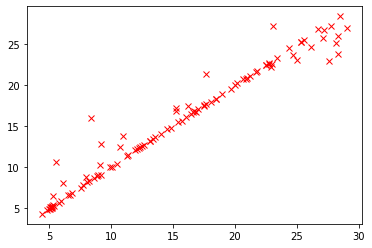

In [9]:
all_labels = np.array(all_values)

plt.plot(all_labels[:,0]*100, all_labels[:,1], 'rx')

In [10]:
all_values[:4]

[[0.1997874407087244, 20.078983908536237],
 [0.0806490061794199, 8.165135785064656],
 [0.1261954484496988, 12.719655690909429],
 [0.1524675218377985, 17.216471527238664]]